In [1]:
import sys, time, cProfile, pstats, importlib, os, itertools
sys.path.insert(0,'/home/uq/apps/muq2inst/lib')
from concurrent.futures import ProcessPoolExecutor

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40., 7.)
matplotlib.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D

import pymuqUtilities as mu

import plotutil

from GaussianPosterior import GaussianPosterior
from DeepTransportMap import *

In [2]:
mu.MultiIndexFactory.CreateAnisotropic([.7], .002).Size()

18

# Target densities for different depths L

Number of multi-indices :  7
[1]
[0.1, 1]
[0.01, 0.1, 1]


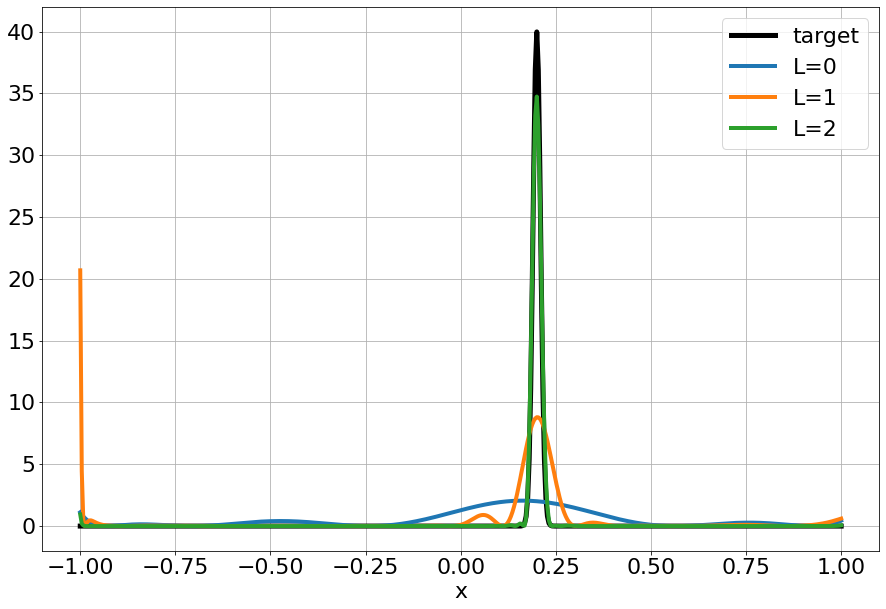

In [3]:
temp_list = [[10**(-L+n) for n in range(L+1)] for L in range(3)]
multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .1)
print('Number of multi-indices : ', multiset.Size())

x = np.linspace(-1, 1, 501)
target = GaussianPosterior(noise=.01, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

ax1 = plotutil.get_ax(plt.figure(figsize=(15,10)), 1, 1, title='')
ax1.plot(x, true_target, lw=5, color='k', label='target')

for temps in temp_list :
    print(temps)
    deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')
    density = [deeptm.density([xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    ax1.plot(x, density, lw=4, label='L=' + str(len(temps)-1))

ax1.legend()
#plt.savefig('dirt_example_1d.pdf', format='pdf')
plt.show()

# Bridging densities

Number of multi-indices :  15
0 0.125 1
1 0.25 2
2 0.5 3
3 1 4


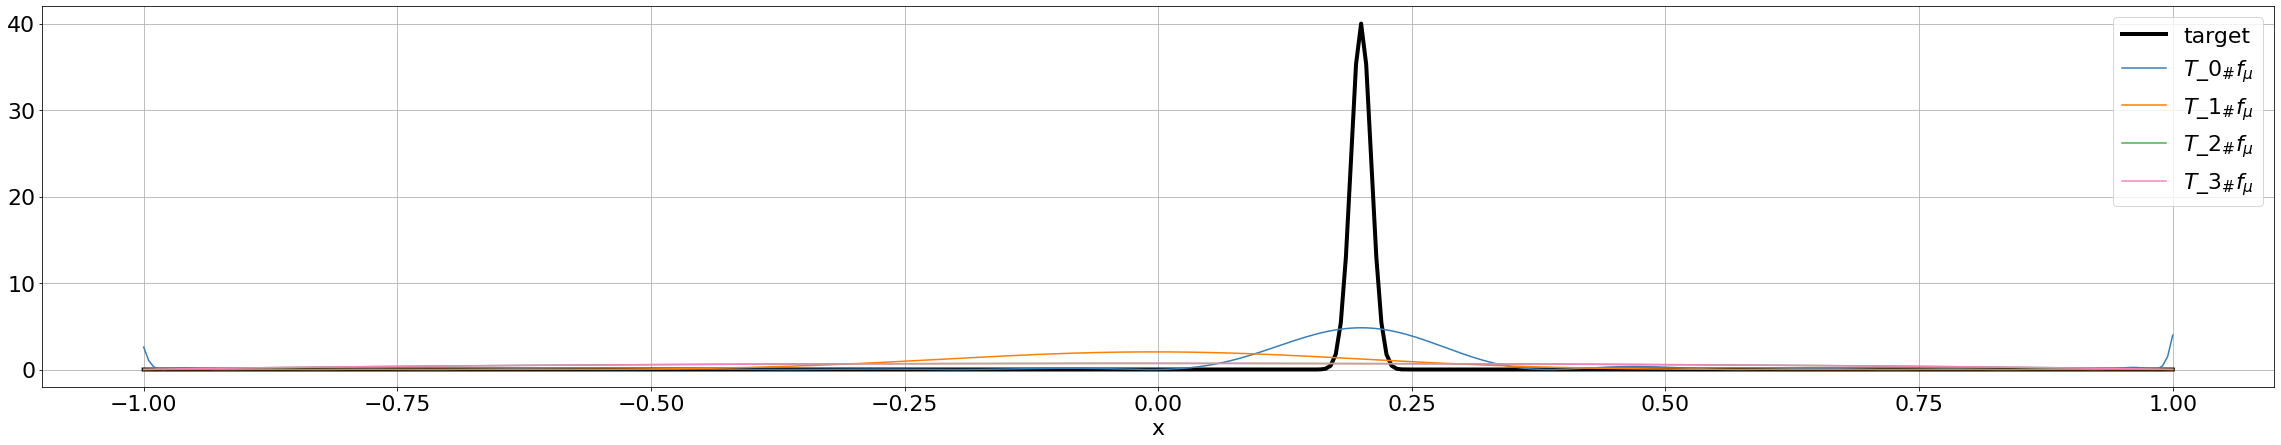

In [6]:
x = np.linspace(-1, 1, 401)

L = 3
temps = [2**(-L+n) for n in range(L+1)]

target = GaussianPosterior(noise=.01, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .005)
print('Number of multi-indices : ', multiset.Size())
deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')

ax1 = plotutil.get_ax(plt.figure(), 1, 1, title='')
ax1.plot(x, true_target, 'k', linewidth = 4, label='target')

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
for i in range(len(deeptm.maps)) :
    print(i, temps[i], len(deeptm.maps[:i+1]))
    density = [deeptm.maps[i].density([xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    
    ax1.plot(x, density, color=colors[i], label=r'$T$_'+str(i)+r'$_\# f_\mu$')
    
ax1.legend()
plt.show()

Number of multi-indices :  9
0 0.125 1
1 0.25 2
2 0.5 3
3 1 4


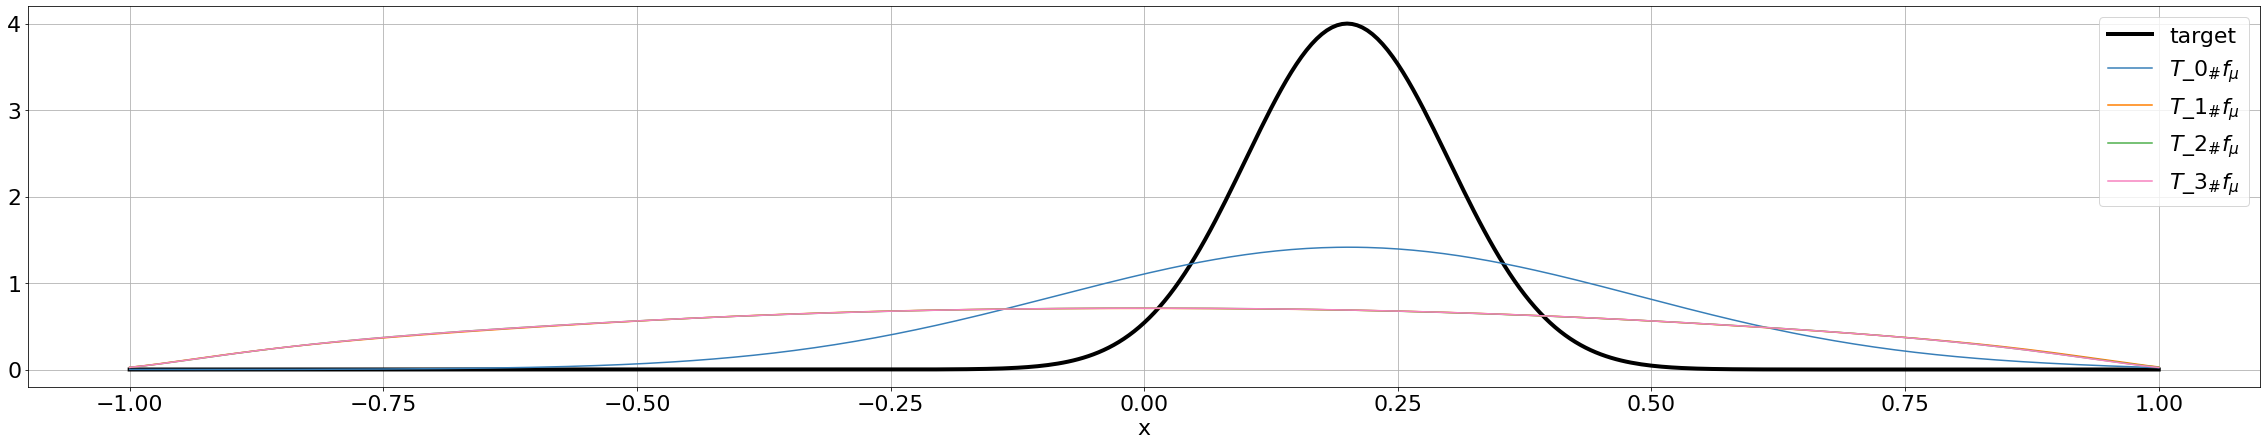

In [7]:
x = np.linspace(-1, 1, 401)

L = 3
temps = [2**(-L+n) for n in range(L+1)]

target = GaussianPosterior(noise=.1, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .05)
print('Number of multi-indices : ', multiset.Size())
deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')

ax1 = plotutil.get_ax(plt.figure(), 1, 1, title='')
ax1.plot(x, true_target, 'k', linewidth = 4, label='target')

colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
for i in range(len(deeptm.maps)) :
    print(i, temps[i], len(deeptm.maps[:i+1]))
    density = [deeptm.maps[i].density([xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    
    ax1.plot(x, density, color=colors[i], label=r'$T$_'+str(i)+r'$_\# f_\mu$')
    
ax1.legend()
plt.show()

Number of multi-indices :  5
0 0.0625 1
1 0.125 2
2 0.25 3
3 0.5 4
4 1 5


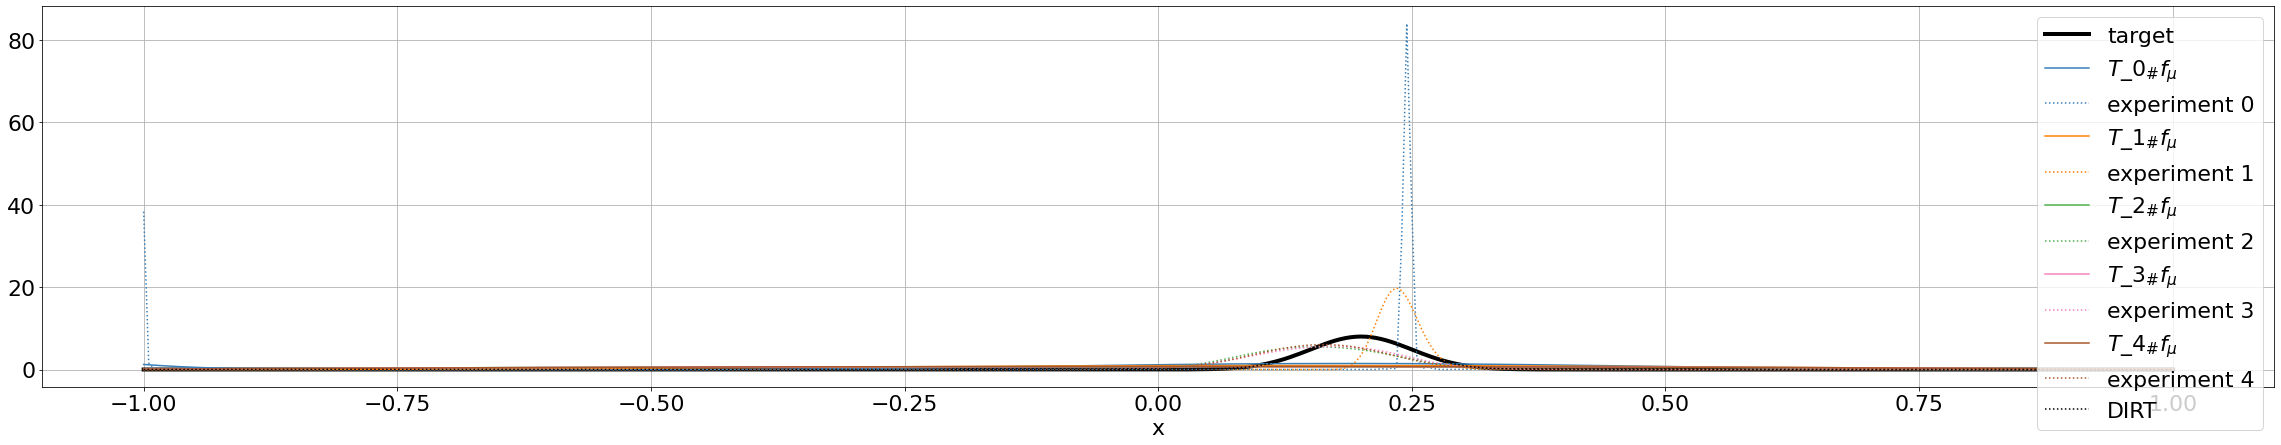

In [7]:
x = np.linspace(-1, 1, 401)

L = 4
temps = [2**(-L+n) for n in range(L+1)]

target = GaussianPosterior(noise=.05, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .2)
print('Number of multi-indices : ', multiset.Size())
deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')

ax1 = plotutil.get_ax(plt.figure(), 1, 1, title='')
ax1.plot(x, true_target, 'k', linewidth = 4, label='target')


colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
for i in range(len(deeptm.maps)) :
    print(i, temps[i], len(deeptm.maps[:i+1]))
    density = [deeptm.maps[i].density([xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    
    ax1.plot(x, density, color=colors[i], label=r'$T$_'+str(i)+r'$_\# f_\mu$')
    

    density = [g_bar_x([deeptm.maps[0]] + [deeptm.maps[i]]*(len(temps)-1), [xi]) for xi in x]
    density /= np.sum(density)*2/len(x)

    ax1.plot(x, density, color=colors[i], ls=':', label=r'experiment '+str(i))
    
density = [deeptm.density([xi]) for xi in x]
density /= np.sum(density)*2/len(x)
ax1.plot(x, density, 'k:', label='DIRT')


ax1.legend()
plt.show()

Number of multi-indices :  9
0 0.01 1
1 0.1 2
2 1 3


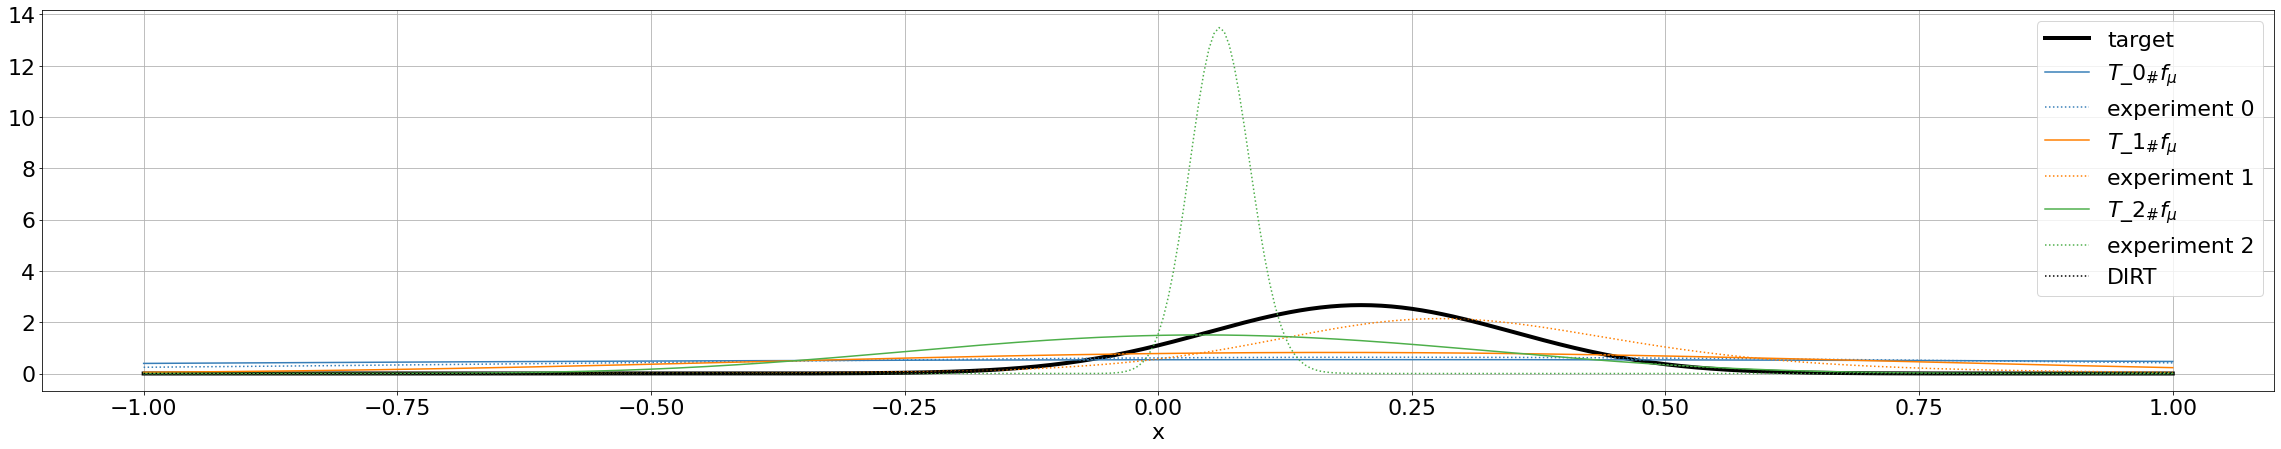

In [13]:
x = np.linspace(-1, 1, 401)

L = 3
temps = [0.01, .1, 1] #[2**(-L+n) for n in range(L+1)]

target = GaussianPosterior(noise=.15, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .05)
print('Number of multi-indices : ', multiset.Size())
deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')

ax1 = plotutil.get_ax(plt.figure(), 1, 1, title='')
ax1.plot(x, true_target, 'k', linewidth = 4, label='target')


colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
for i in range(len(deeptm.maps)) :
    print(i, temps[i], len(deeptm.maps[:i+1]))
    density = [deeptm.maps[i].density([xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    
    ax1.plot(x, density, color=colors[i], label=r'$T$_'+str(i)+r'$_\# f_\mu$')
    

    density = [g_bar_x([deeptm.maps[i]]*len(temps), [xi]) for xi in x]
    density /= np.sum(density)*2/len(x)

    ax1.plot(x, density, color=colors[i], ls=':', label=r'experiment '+str(i))
    
density = [deeptm.density([xi]) for xi in x]
density /= np.sum(density)*2/len(x)
ax1.plot(x, density, 'k:', label='DIRT')


ax1.legend()
plt.show()

# Tempered target densities

Number of multi-indices :  9
0 0.001 1
1 0.01 2
2 0.1 3
3 1 4


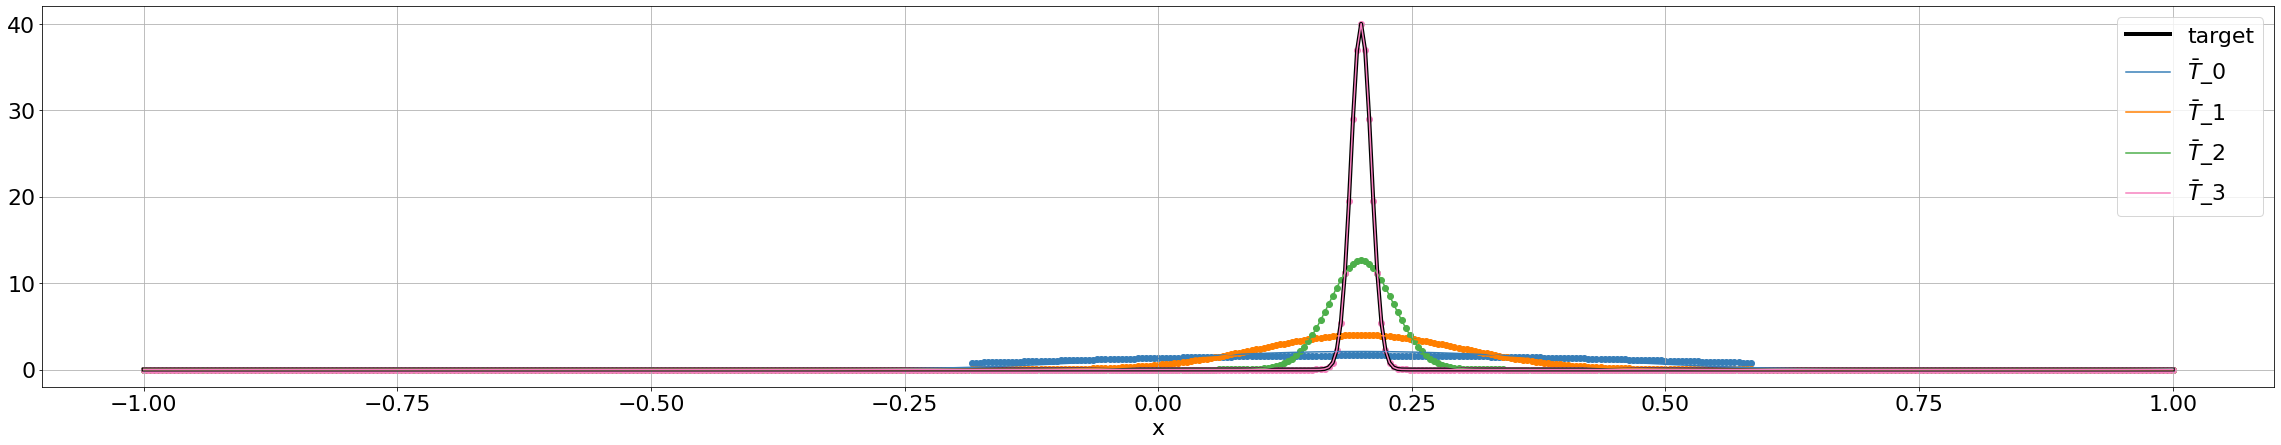

In [14]:
x = np.linspace(-1, 1, 501)

L = 2
temps = [.001, .01, .1, 1]# + [2**(-L+n) for n in range(1,L+1)]

target = GaussianPosterior(noise=.01, y_measurement=[.2])
true_target = np.array([target.Evaluate([np.array([xi])])[0][0] for xi in x])
true_target /= np.sum(true_target)*2/len(x)

multiset = mu.MultiIndexFactory.CreateAnisotropic([.7], .05)
print('Number of multi-indices : ', multiset.Size())
deeptm = DeepTransportMap(1, target, temps, multiset, 'wls')

ax1 = plotutil.get_ax(plt.figure(), 1, 1, title='')
ax1.plot(x, true_target, 'k', linewidth = 4, label='target')


colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
for i in range(len(deeptm.maps)) :
    print(i, temps[i], len(deeptm.maps[:i+1]))
    density = [g_bar_x(deeptm.maps[:i+1], [xi]) for xi in x]
    density /= np.sum(density)*2/len(x)
    
    ax1.plot(x, density, color=colors[i], label=r'$\bar{T}$_'+str(i))
    
    true_target = np.array([(target.Evaluate([np.array([xi])])[0][0])**(temps[i]) for xi in x])
    true_target /= np.sum(true_target)*2/len(x)
    ax1.scatter(x, true_target, color=colors[i])

ax1.legend()
plt.show()

In [27]:
len(deeptm.maps)

4

In [26]:
temps

[0.125, 0.25, 0.5, 1]

# DIRT to approximate 2D Gaussian

Number of multi-indices :  45
[1]
[0.1, 1]
[0.01, 0.1, 1]


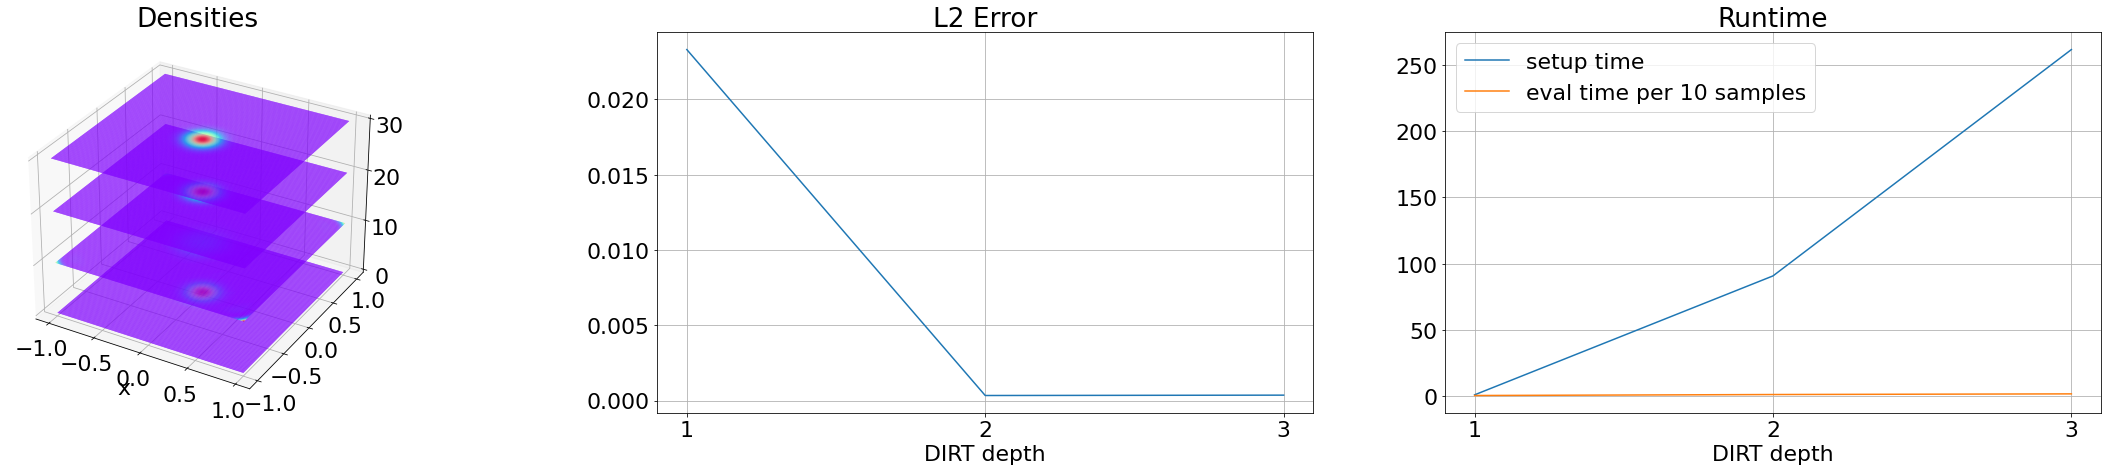

In [3]:
fig = plt.figure()
nbins = 201
x = np.linspace(-1, 1, nbins)

l2_errs = []
t_setup = []
t_eval  = []

ax1 = plotutil.get_ax(fig, 3, 1, title='Densities', projection='3d')

target   = GaussianPosterior(noise=.1, y_measurement=[0., 0.])
multiset = mu.MultiIndexFactory.CreateAnisotropic([.4, .4], .0005)
print('Number of multi-indices : ', multiset.Size())

X, Y   = np.meshgrid(x, x)
points = np.vstack((X.flatten(), Y.flatten())).transpose()

true_target = np.array([target.Evaluate([xi])[0][0] for xi in points])
true_target /= np.sum(true_target)

levels = np.linspace(0, 0.1, 100)  #(z_min,z_max,number of contour),

ax1.plot_surface(X, Y, true_target.reshape((len(x), len(x))), rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

temp_list = [[10**(-L+n) for n in range(L+1)] for L in range(3)]
for temps in temp_list :
    print(temps)
    start = time.process_time()
    deeptm = DeepTransportMap(2, target, temps, multiset)
    t_setup.append(time.process_time() - start)

    start = time.process_time()
    samples = np.array([deeptm.evaluate(np.random.uniform(low=-1, high=1, size=(2,))) for _ in range(10)])
    t_eval.append(time.process_time() - start)

    density = [deeptm.density(xi) for xi in points]
    density /= np.sum(density)

    offset = 10*len(temps)
    ax1.plot_surface(X, Y, offset+density.reshape((len(x), len(x))), rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

    l2_errs.append(np.sqrt(np.sum((true_target - density)**2)))

depths = [len(temps) for temps in temp_list]
ax2 = plotutil.get_ax(fig, 3, 2, title='L2 Error', xlabel='DIRT depth')
ax2.set_xticks(depths)
ax2.plot(depths, l2_errs)

ax3 = plotutil.get_ax(fig, 3, 3, title='Runtime', xlabel='DIRT depth')
ax3.set_xticks(depths)
ax3.plot(depths, t_setup, label='setup time')
ax3.plot(depths, t_eval, label='eval time per 10 samples')

ax3.legend()
plt.show()

In [5]:
[mu.MultiIndexFactory.CreateAnisotropic([.42, .41], 1/(10**i)).Size() for i in range(1,9)]

[6, 21, 36, 66, 101, 136, 190, 240]